# Aprendizado Não-Supervisionado (K-Means)

## Agrupando clientes pelos seus respectivos padrões de consumo

### Definição do problema
Para ilustrar a utilização do algoritmo K-Means, temos alguns dados de clientes de uma determinada loja fictícia. Para cada cliente, nós temos sua idade, sua renda anual (em milhares de dólares) e uma pontuação que determina o nível de gastos do cliente nesta loja (variando de 1 a 100).

Com essas informações, podemos agrupar estes clientes pelos seus padrões de consumo, o que auxilia em decisões de marketing, potencialmente em serviços de crédito e outras coisas que acontecem no mundo capitalista.

### Etapa 1: Importando bibliotecas, lendo os dados

Assim como no exemplo anterior, vamos começar com a importação de algumas bibliotecas e com a leitura dos dados que serão utilziados neste exemplo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
data = pd.read_csv('store.csv')

In [27]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Podemos traduzir os nomes das colunas para auxiliar a visualização dos dados posteriormente.

In [3]:
data.columns = ['IdCliente', 'Gênero', 'Idade', 'Renda Anual',
       'Nível de Gasto (1-100)']

In [30]:
data.head()

,IdCliente,Gênero,Idade,Renda Anual,Nível de Gasto (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Podemos ver acima que, além do identificador do cliente, o dataframe construído a partir do csv também tem um identificador adicional. Como isso é redundante, vamos definir o campo 'IdCliente' como o índice deste dataframe. Após isso, vamos definir um outro dataframe contendo apenas os campos relevantes para este exemplo (a renda anual e o nível de gasto).

In [4]:
data.set_index('IdCliente', inplace=True)

In [5]:
df = data[['Renda Anual', 'Nível de Gasto (1-100)']]

Antes de executar o algoritmo K-Means, podemos plotar as instâncias do dataframe acima em um plano 2d para visualizar os dados.

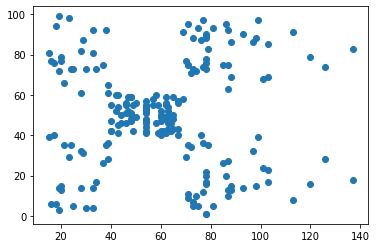

In [34]:
plt.scatter(df['Renda Anual'], df['Nível de Gasto (1-100)'])

### Etapa 2: Testes e verificação da quantidade de grupos
Com os dados carregados, podemos fazer execuções do algoritmo K-means com uma simples chamada da respectiva função da biblioteca sklearn. No entanto, não sabemos exatamente qual seria o melhor número de grupos, apesar de podermos intuitivamente verificar a partir do gráfico acima. Mesmo assim, para exemplificar os métodos que podemos usar para avaliar os agrupamentos pelo número de grupos, vamos fazer várias execuções e analisar o desempenho de cada uma.

#### Etapa 2.1: Método Elbow (Cotovelo)
Para aplicar o método Elbow, vamos executar o K-means um número arbitrário de vezes (neste exemplo, 10 vezes) e analizar a qualidade dos grupos a partir do valor de inércia (distância de cada instância ao centróide de seu grupo).

In [6]:
X = df.values

In [36]:
X.shape

(200, 2)

Text(0, 0.5, 'Inércia')

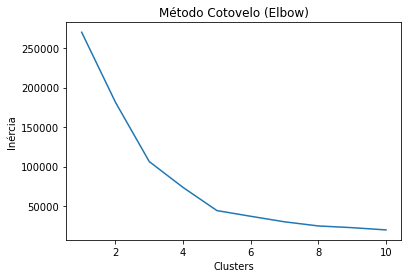

In [39]:
variacoes = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    variacoes.append(kmeans.inertia_)

plt.plot(range(1,11), variacoes)
plt.title('Método Cotovelo (Elbow)')
plt.xlabel('Clusters')
plt.ylabel('Inércia')

Observando o gráfico acima, percebe-se que a planificação da curva ocorre com 5 grupos. Portanto, para nossa execução final, vamos considerar k = 5.

In [40]:
kmeans_final = KMeans(n_clusters=5)

In [41]:
kmeans_final.fit(X)

KMeans(n_clusters=5)

Ao treinar o modelo, podemos então atribuir cada instância dos dados a um grupo (associar cada instância com o centróide mais próximo).

In [42]:
cluster_pred = kmeans_final.predict(X)

In [43]:
cluster_centro = kmeans_final.cluster_centers_

In [44]:
cluster_centro

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

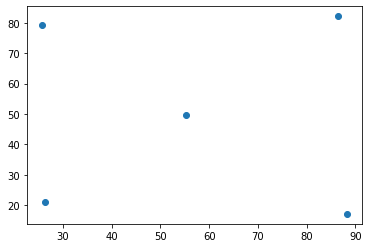

In [45]:
plt.scatter(cluster_centro[:,0],cluster_centro[:,1])

Acima, temos as coordenadas de cada centróide, bem como o plot de cada um. Com as devidas atribuições feitas para cada instância, podemos consultar quais são os indivíduos que pertecem a cada grupo.

In [46]:
X[cluster_pred==3, 0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

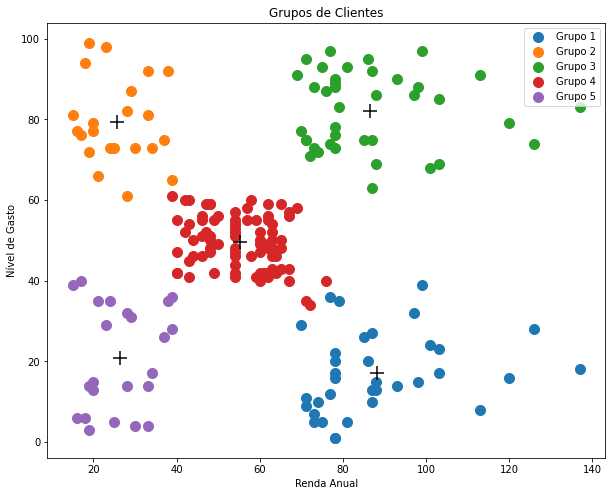

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1],s=100, label='Grupo 1')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1],s=100, label='Grupo 2')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1],s=100, label='Grupo 3')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1],s=100, label='Grupo 4')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1],s=100, label='Grupo 5')
plt.scatter(cluster_centro[:,0],cluster_centro[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Grupos de Clientes')
plt.xlabel('Renda Anual')
plt.ylabel('Nível de Gasto')
plt.show()

Por fim, acima podemos visualizar como cada atribuição dos grupos se relaciona com cada centróide.

### Etapa 2.2: Análise de Silhueta
Para confirmar se o valor de k selecionado realmente foi o mais adequado, vamos plotar os coeficientes de silhueta para cada valor de k testado.

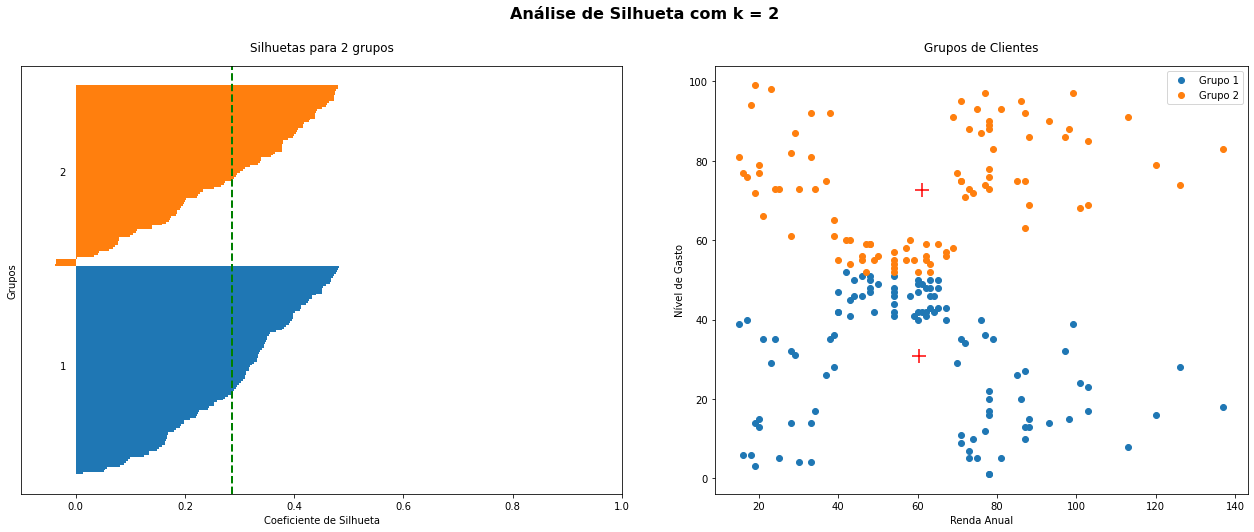

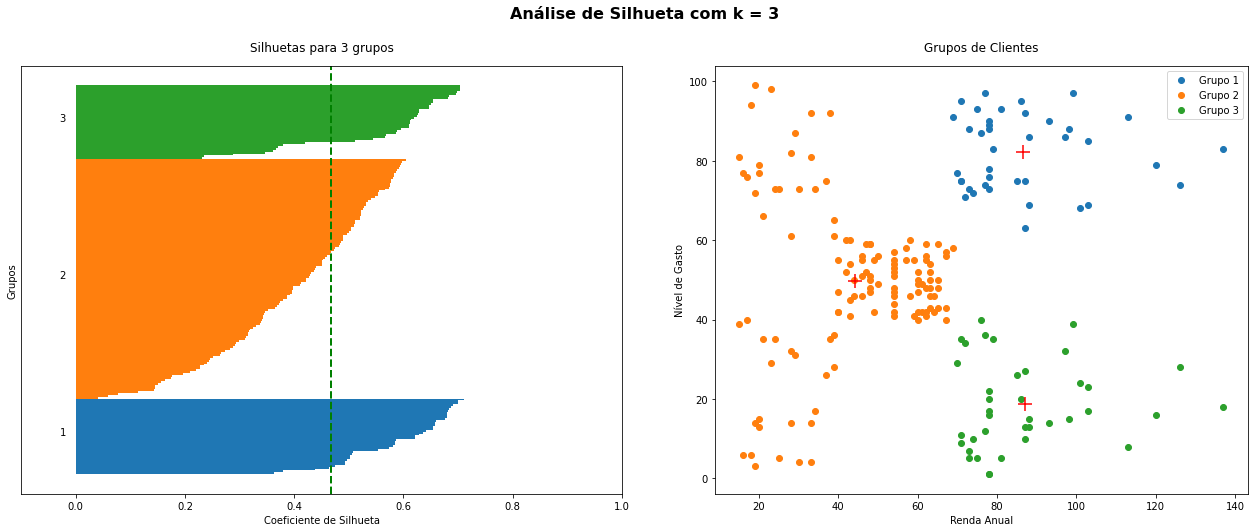

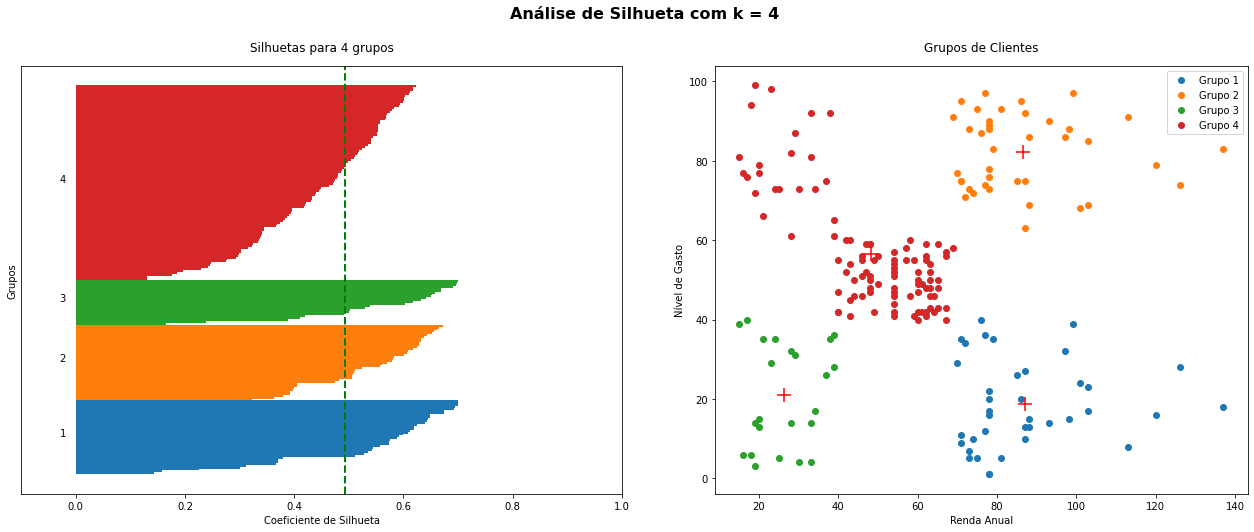

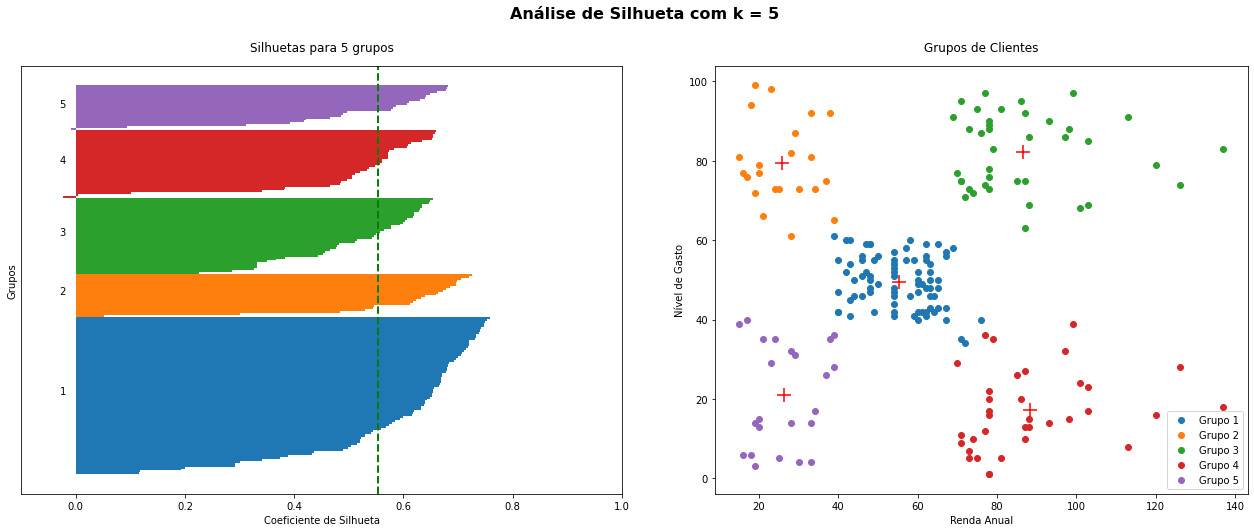

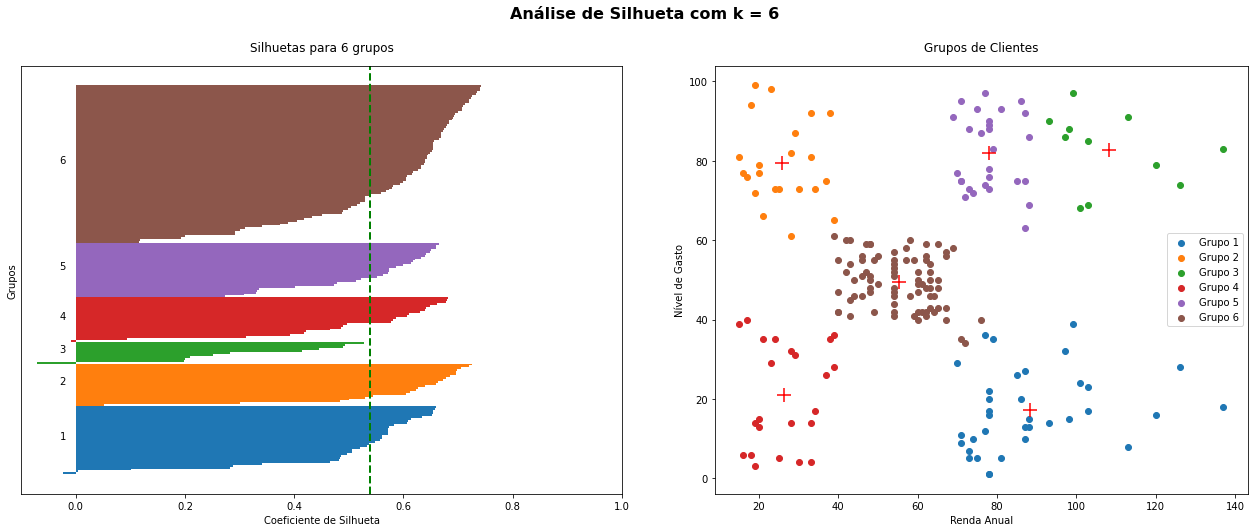

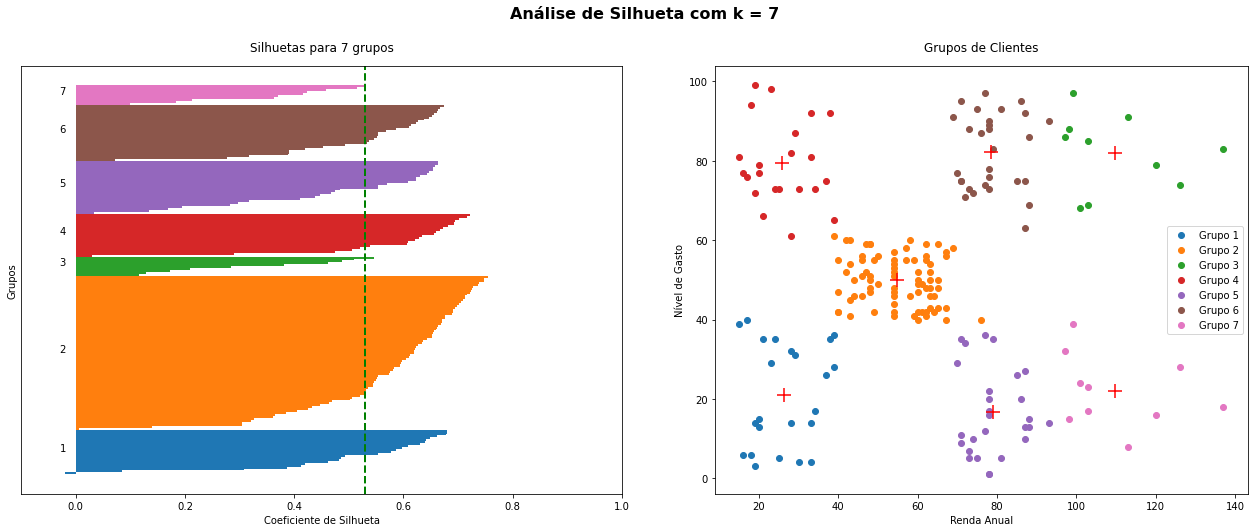

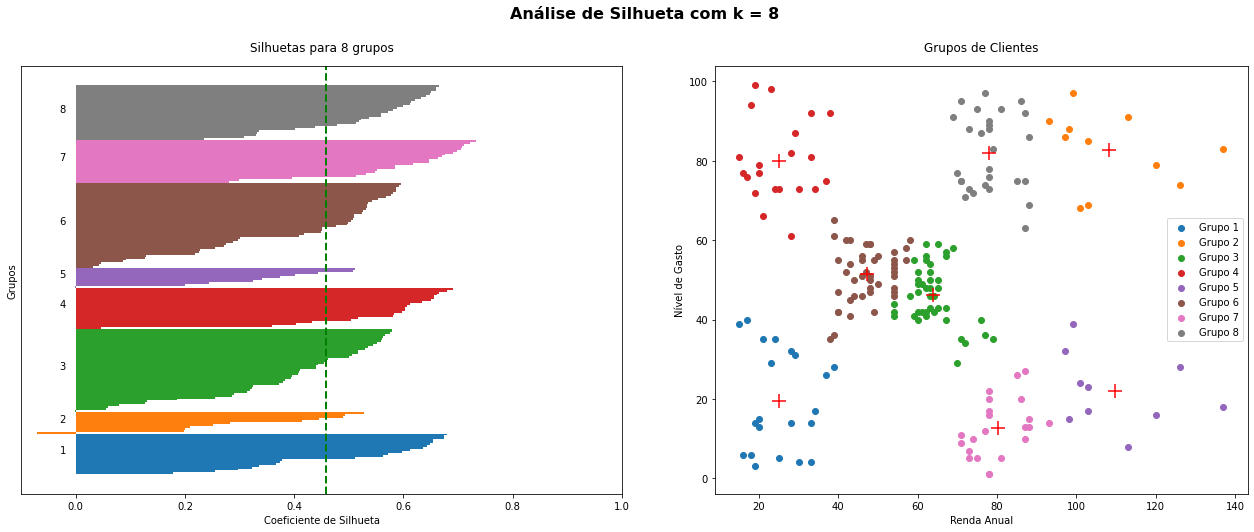

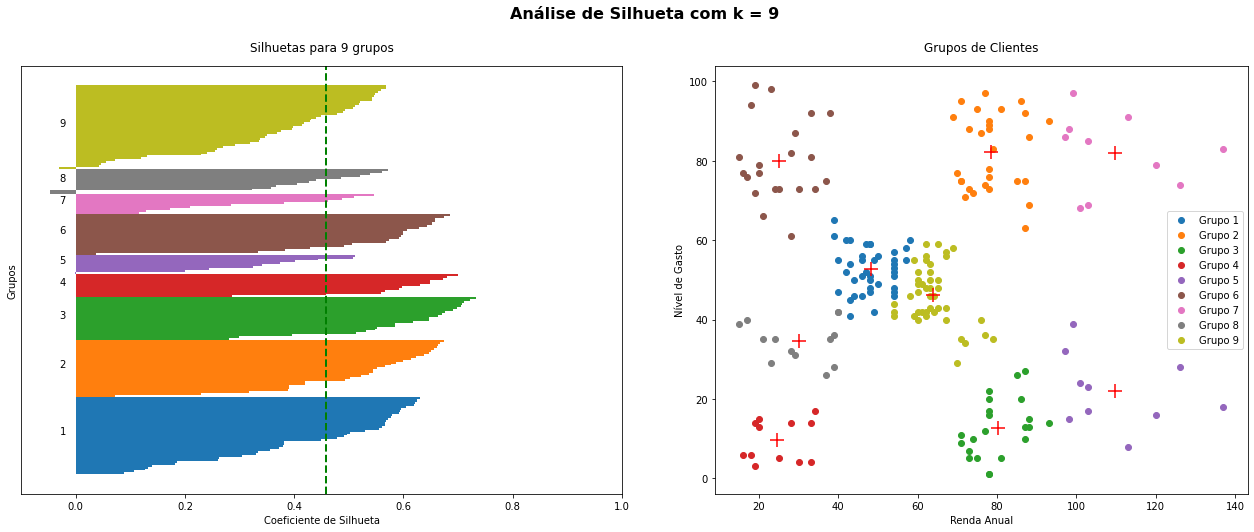

In [16]:
for k in range(2,10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Executar o K-Means com o valor atual de k
    km = KMeans(n_clusters=k)
    cluster_pred = km.fit_predict(X)
    cluster_centro = km.cluster_centers_

    # Calcular os valores de silhueta
    silhouette_vals = silhouette_samples(X, cluster_pred)

    # Plotar as silhuetas
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(cluster_pred)):
        cluster_silhouette_vals = silhouette_vals[cluster_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Plotar o coeficiente de silhueta médio
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Coeficiente de Silhueta')
    ax1.set_ylabel('Grupos')
    ax1.set_title('Silhuetas para {} grupos'.format(k), y=1.02);
    
    # Ilustar os grupos
    for j in range(k):
        ax2.scatter(X[cluster_pred==j, 0], X[cluster_pred==j, 1], label='Grupo {}'.format(j+1))
    ax2.scatter(cluster_centro[:, 0], cluster_centro[:, 1], marker='+', c='r', s=200)
    ax2.legend()
    ax2.set_xlabel('Renda Anual')
    ax2.set_ylabel('Nível de Gasto')
    ax2.set_title('Grupos de Clientes', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle('Análise de Silhueta com k = {}'.format(k),
                 fontsize=16, fontweight='semibold', y=1.05);